In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
local_download_path = os.path.expanduser('~/data')  
try:
  os.makedirs(local_download_path)
except: pass

file_list = drive.ListFile(
    {'q': "'1Kon4n99frWPEEkdMTs4Vi-IB11oLKQrP' in parents"}).GetList()


In [0]:
for f in file_list:
  #print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  #print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

In [0]:
file_list
  

[GoogleDriveFile({'kind': 'drive#file', 'id': '1Pyzq36NqNqlGB0OEx9AK5OWEDL9j1yls', 'etag': '"x2jdlkqYTB8kzPmV7jH2KPtlR68/MTU4MTA1NDI5NzU3Nw"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1Pyzq36NqNqlGB0OEx9AK5OWEDL9j1yls', 'webContentLink': 'https://drive.google.com/uc?id=1Pyzq36NqNqlGB0OEx9AK5OWEDL9j1yls&export=download', 'alternateLink': 'https://drive.google.com/file/d/1Pyzq36NqNqlGB0OEx9AK5OWEDL9j1yls/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1Pyzq36NqNqlGB0OEx9AK5OWEDL9j1yls/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/audio/mid', 'title': '3000adamno_l.mid', 'mimeType': 'audio/mid', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-02-07T05:44:57.577Z', 'modifiedDate': '2020-02-07T05:44:57.577Z', 'modifiedByMeDate': '2020-02-07T05:44:57.577Z', 'lastViewedByMeDate': '2020-02-07T05:44:57.577Z

In [0]:
f_names=[]                                  
for filename in file_list:
  f_names.append(filename['title'])
print(f_names)

['MIDI-Unprocessed_045_PIANO045_MID--AUDIO-split_07-06-17_Piano-e_2-01_wav--2.midi', 'MIDI-Unprocessed_044_PIANO044_MID--AUDIO-split_07-06-17_Piano-e_1-04_wav--1.midi', 'MIDI-Unprocessed_044_PIANO044_MID--AUDIO-split_07-06-17_Piano-e_1-04_wav--2.midi', 'MIDI-Unprocessed_043_PIANO043_MID--AUDIO-split_07-06-17_Piano-e_1-03_wav--4.midi', 'MIDI-Unprocessed_045_PIANO045_MID--AUDIO-split_07-06-17_Piano-e_2-01_wav--1.midi', 'MIDI-Unprocessed_044_PIANO044_MID--AUDIO-split_07-06-17_Piano-e_1-04_wav--3.midi', 'MIDI-Unprocessed_044_PIANO044_MID--AUDIO-split_07-06-17_Piano-e_1-04_wav--4.midi', 'MIDI-Unprocessed_043_PIANO043_MID--AUDIO-split_07-06-17_Piano-e_1-03_wav--2.midi', 'MIDI-Unprocessed_043_PIANO043_MID--AUDIO-split_07-06-17_Piano-e_1-03_wav--3.midi', 'MIDI-Unprocessed_043_PIANO043_MID--AUDIO-split_07-06-17_Piano-e_1-03_wav--1.midi', 'MIDI-Unprocessed_041_PIANO041_MID--AUDIO-split_07-06-17_Piano-e_1-01_wav--4.midi', 'MIDI-Unprocessed_041_PIANO041_MID--AUDIO-split_07-06-17_Piano-e_1-01_wav--

In [0]:
from music21 import converter, instrument, note, chord
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [0]:
def midi_notes(filename):
   midi = converter.parse(filename)
   notes_to_parse = None
   notes=[]
   parts = instrument.partitionByInstrument(midi)
   #print(parts)
   if parts:
     notes_to_parse = parts.parts[0].recurse() # file has instrument parts
   else:
     notes_to_parse = midi.flat.notes # file has notes in a flat structure
   for element in notes_to_parse:
     if isinstance(element, note.Note):
       notes.append(str(element.pitch))
   return notes    
     #elif isinstance(element, chord.Chord):
       #notes.append(' '.join(n for n in element.normalOrder)

In [0]:
#midi_notes(3003marquise.mid)

SyntaxError: ignored

In [0]:

def unique_notes_int(notes):
  pitchnames = sorted(set(item for item in notes))
  note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
  return note_to_int

In [0]:
def convert_all_notes_int(notes,note_to_int):
  sequence_length=100
  network_input=[]
  for i in range(0, len(notes)-sequence_length,1):
    sequence_in = notes[i:i+sequence_length]
    for char in sequence_in:
      c=note_to_int[char]
      network_input.append(c)
    return network_input
    
    
    

In [0]:

all_notes=[]
for midiname in f_names:
  path='/root/data/'
  path+=midiname
  notes=midi_notes(path)
  #print(type(path))
  all_notes.append(notes)
 
  


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [0]:
final_notes=[]
for li in all_notes:
  for item in li:
    final_notes.append(item)  
print(final_notes)               

['B4', 'B3', 'D5', 'D4', 'B4', 'B3', 'G4', 'G3', 'A4', 'A3', 'B4', 'B3', 'G4', 'G3', 'D4', 'D3', 'C#4', 'D4', 'E-4', 'E4', 'F4', 'F#4', 'G4', 'E5', 'E6', 'D6', 'C6', 'A5', 'G#5', 'B5', 'A5', 'E6', 'D6', 'C6', 'B5', 'D6', 'C6', 'B5', 'A5', 'E6', 'D6', 'C6', 'B5', 'D6', 'C6', 'B5', 'A5', 'E6', 'D6', 'C6', 'B5', 'D6', 'C6', 'B5', 'A5', 'C6', 'A5', 'E5', 'A5', 'E5', 'C5', 'A4', 'C5', 'C4', 'E5', 'E4', 'C5', 'C4', 'A4', 'A3', 'B4', 'B3', 'C5', 'C4', 'A4', 'A3', 'E4', 'E3', 'E-4', 'E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A5', 'C3', 'B5', 'A3', 'C6', 'D5', 'G5', 'A5', 'G5', 'F#5', 'D3', 'D5', 'B5', 'G3', 'D6', 'C6', 'B5', 'A5', 'G5', 'C3', 'A5', 'G5', 'F#5', 'E5', 'D5', 'D3', 'D6', 'B5', 'A5', 'G5', 'B5', 'G5', 'E5', 'D5', 'G5', 'D5', 'C5', 'B4', 'D5', 'B4', 'A4', 'G4', 'B4', 'G4', 'E4', 'D4', 'G4', 'D4', 'C4', 'B3', 'D4', 'B3', 'A3', 'G3', 'D4', 'D4', 'D6', 'D4', 'C#6', 'D6', 'E6', 'E4', 'D6', 'D6', 'B5', 'D4', 'G5', 'D4', 'A5', 'D4', 'D6', 'C6', 'B5', 'D4', 'A5', 'G5', 'A5', 'B5', 'D4', 'C6',

In [0]:
note_to_int=unique_notes_int(final_notes)
note_to_int

{'A2': 0,
 'A3': 1,
 'A4': 2,
 'A5': 3,
 'A6': 4,
 'B-2': 5,
 'B-3': 6,
 'B-4': 7,
 'B-5': 8,
 'B2': 9,
 'B3': 10,
 'B4': 11,
 'B5': 12,
 'B6': 13,
 'C#3': 14,
 'C#4': 15,
 'C#5': 16,
 'C#6': 17,
 'C3': 18,
 'C4': 19,
 'C5': 20,
 'C6': 21,
 'C7': 22,
 'D3': 23,
 'D4': 24,
 'D5': 25,
 'D6': 26,
 'E-3': 27,
 'E-4': 28,
 'E-5': 29,
 'E-6': 30,
 'E3': 31,
 'E4': 32,
 'E5': 33,
 'E6': 34,
 'F#3': 35,
 'F#4': 36,
 'F#5': 37,
 'F#6': 38,
 'F3': 39,
 'F4': 40,
 'F5': 41,
 'F6': 42,
 'G#3': 43,
 'G#4': 44,
 'G#5': 45,
 'G#6': 46,
 'G2': 47,
 'G3': 48,
 'G4': 49,
 'G5': 50,
 'G6': 51}

In [0]:
key_list = list(note_to_int.keys()) 
val_list = list(note_to_int.values())

In [0]:
f_list=[]
for midiname in f_names:
  path='/root/data/'
  path+=midiname
  notes=midi_notes(path)
  network_in=convert_all_notes_int(notes,note_to_int)
  f_list.append(network_in)
  




In [0]:
print(len(f_list))

3


In [0]:
import torch
tensor = torch.FloatTensor(f_list)

In [0]:
tensor

tensor([[11., 10., 25., 24., 11., 10., 49., 48.,  2.,  1., 11., 10., 49., 48.,
         24., 23., 15., 24., 28., 32., 40., 36., 49., 33., 34., 26., 21.,  3.,
         45., 12.,  3., 34., 26., 21., 12., 26., 21., 12.,  3., 34., 26., 21.,
         12., 26., 21., 12.,  3., 34., 26., 21., 12., 26., 21., 12.,  3., 21.,
          3., 33.,  3., 33., 20.,  2., 20., 19., 33., 32., 20., 19.,  2.,  1.,
         11., 10., 20., 19.,  2.,  1., 32., 31., 28., 32., 40., 36., 49., 44.,
          2.,  3., 18., 12.,  1., 21., 25., 50.,  3., 50., 37., 23., 25., 12.,
         48., 26.],
        [32., 18., 40., 49., 31.,  2., 11., 48., 20., 25., 19., 33., 41., 23.,
         50.,  3., 39., 12., 21., 48., 26., 34., 10., 42., 51., 31., 42., 34.,
         48., 26., 17.,  6.,  8.,  3., 15., 50., 41., 39., 25., 26.,  1., 21.,
         12., 19.,  3., 50., 40., 41., 33., 48., 20., 21., 19., 12.,  3., 32.,
         50., 41., 49., 33., 25., 48., 33., 41., 24., 37., 50., 40., 45.,  3.,
         49., 12., 21., 21., 20.

In [0]:
from torch.utils.data import TensorDataset, DataLoader
dataloader=DataLoader(tensor,batch_size=4,shuffle=True)

In [0]:
def make_some_noise(size):
    return torch.rand(size,100)

In [0]:
def real_data_target(size):
    data = Variable(torch.ones(size, 1))
    return data

In [0]:
def fake_data_target(size):
    data = Variable(torch.zeros(size, 1))
    return data

In [0]:
class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,1000),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(1000,800),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(800,out)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [0]:
gen = generator(100,100)

In [0]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=800, out_features=100, bias=True)
  )
)

In [0]:
class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,200),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [0]:
dis = discriminator(100,1)

In [0]:
dis

discriminator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=200, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [0]:
d_steps = 100
g_steps = 100

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.001, momentum=0.9)

printing_steps = 200

epochs = 50

In [0]:
batch_size=5
import numpy as np
discriminator_loss=[]
generator_loss=[]
for epoch in range(epochs):
    

    # training discriminator
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        for vec in dataloader:
            inp_real_x = vec
            break

        
        dis_real_out = dis(inp_real_x)
        dis_real_loss = criteriond1(dis_real_out,real_data_target(tensor.size(0)))
        dis_real_loss.backward()
        discriminator_loss.append(dis_real_loss.item())

        # training discriminator on data produced by generator
        inp_fake_x_gen = make_some_noise(vec.size(0))
        dis_inp_fake_x = gen(inp_fake_x_gen).detach() #output from generator is generated
        dis_fake_out = dis(dis_inp_fake_x)
        dis_fake_loss = criteriond1(dis_fake_out,fake_data_target(tensor.size(0)))
        dis_fake_loss.backward()

        optimizerd1.step()


    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        gen_inp =make_some_noise(vec.size(0))
        
        gen_out = gen(gen_inp)
        dis_out_gen_training = dis(gen_out)
        gen_loss = criteriond2(dis_out_gen_training,real_data_target(dis_out_gen_training.size(0)))
        gen_loss.backward()
        
        optimizerd2.step()  
        generator_loss.append(gen_loss.item()) 
    print("Discriminator loss:{}".format(np.mean(discriminator_loss)),"    Generator  loss:{}".format(np.mean(generator_loss)))         

Discriminator loss:0.014174470054914252     Generator  loss:0.9932123619318008
Discriminator loss:0.007087832465867479     Generator  loss:1.1489935317635536
Discriminator loss:0.004726315063604053     Generator  loss:1.3035836488008499
Discriminator loss:0.0035469672311231903     Generator  loss:1.4558331499993802
Discriminator loss:0.002843231305693109     Generator  loss:1.6028485487699509
Discriminator loss:0.0023876441223988822     Generator  loss:1.7422577372193337
Discriminator loss:0.0020890312484869306     Generator  loss:1.874875870347023
Discriminator loss:0.0018841610105814156     Generator  loss:2.0099828618019817
Discriminator loss:0.0017279164036610143     Generator  loss:2.1511323718892204
Discriminator loss:0.0015924000656060856     Generator  loss:2.2752500342726707
Discriminator loss:0.0014999987159181284     Generator  loss:2.3593958279761402
Discriminator loss:0.0014971411752876188     Generator  loss:2.3775928548475105
Discriminator loss:0.0017304962554752024     

In [0]:



200

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

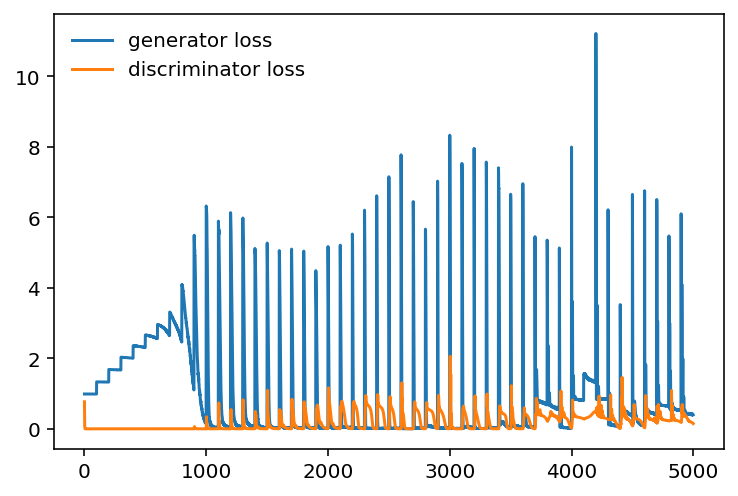

In [0]:
plt.plot(generator_loss,label = "generator loss")
plt.plot(discriminator_loss,label = "discriminator loss")
plt.legend(frameon = False)

In [0]:

def genet():
  predicted_notes=[]
  pred=[]
  noise=torch.rand(100,100)
  predictions=gen.forward(noise)
  predictions=predictions.tolist()
  #print(len(predictions[0])) 
  for li in predictions:
    for num in li:
      num=int(num)
      pred.append(num)  
  #print(pred) 
  print(val_list)       
  for num in pred:
    closest=[]
    for key in val_list:
      
      dif=abs(num-key)
      closest.append(dif)  
    close_int=closest.index(min(closest))
    #print(close_int)
    num=val_list[close_int]
  #print(pred) 
  preds=[]
  for i in pred:
    if(i<52):
      preds.append(i)
    
  for num in preds:
    predicted_notes.append(key_list[val_list.index(abs(num))])
  #print(val_list)  
  return(predicted_notes)  
  


    
    




In [0]:
predicted_notes=genet()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [0]:
 import music21
 s = music21.stream.Stream()
 for note in predicted_notes:
   s.append(music21.note.Note(note))

In [0]:
s.show('text')

{0.0} <music21.note.Note B->
{1.0} <music21.note.Note C#>
{2.0} <music21.note.Note E->
{3.0} <music21.note.Note C>
{4.0} <music21.note.Note C#>
{5.0} <music21.note.Note B>
{6.0} <music21.note.Note A>
{7.0} <music21.note.Note A>
{8.0} <music21.note.Note A>
{9.0} <music21.note.Note B>
{10.0} <music21.note.Note G>
{11.0} <music21.note.Note E->
{12.0} <music21.note.Note D>
{13.0} <music21.note.Note C#>
{14.0} <music21.note.Note C>
{15.0} <music21.note.Note E->
{16.0} <music21.note.Note F#>
{17.0} <music21.note.Note F>
{18.0} <music21.note.Note F#>
{19.0} <music21.note.Note G#>
{20.0} <music21.note.Note E>
{21.0} <music21.note.Note D>
{22.0} <music21.note.Note A>
{23.0} <music21.note.Note C>
{24.0} <music21.note.Note A>
{25.0} <music21.note.Note F>
{26.0} <music21.note.Note E>
{27.0} <music21.note.Note C>
{28.0} <music21.note.Note C#>
{29.0} <music21.note.Note E>
{30.0} <music21.note.Note C>
{31.0} <music21.note.Note C#>
{32.0} <music21.note.Note B->
{33.0} <music21.note.Note F#>
{34.0} <mu

In [0]:
file=s.write("midi", "generated_music.mid")

In [0]:
from google.colab import files
files.download('generated_music.mid')